# Carregar bibliotecas

In [0]:
  from __future__ import absolute_import, division, print_function, unicode_literals
  import pathlib

  import pandas as pd 
  # O pandas é uma biblioteca de código aberto que fornece estruturas de dados de 
  # alto desempenho e fáceis de usar e ferramentas de análise

  import io           
  # entrada e saída. 
  # O módulo io fornece as interfaces Python para o fluxo de manipulação.

  import matplotlib.pyplot as plt 
  # O Matplotlib é uma biblioteca de plotagem 2D do Python
  # mais detalhes em: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

  !pip install -q seaborn
  import seaborn as sns
  # Seaborn é uma biblioteca de visualização de dados Python baseada no matplotlib. 
  # Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.

  from sklearn import preprocessing 
  from sklearn.preprocessing import MinMaxScaler
  # Ferramentas simples e eficientes para mineração e análise de dados

  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras import layers

  from keras.models import Sequential
  from keras.layers import Dense, Activation


Using TensorFlow backend.


# Inserir dados na Nuvem


* Você tem algumas opções para ler os dados: 

* Pode ser de um link de repositório
* Pode ser do google drive
* Também pode fazer o upload do seu diretório





** Exemplo de como baixar dados já disponíveis em links **

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Equipes.xlsx to Equipes.xlsx


# Carregar dados

* O passo seguinte, você pode carregar os seus dados a partir dos arquivos que fez upload:

In [0]:
dataset = pd.read_excel(io.BytesIO(uploaded['Equipes.xlsx']))

* Você também pode ler dados com extensão csv

dataset = pd.read_csv('NomeDoArquivo.csv')

Mais informações em [link text](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

# Visualizar dados


In [0]:
dataset

,Data,ANO,MÊS,CSD,EQUIPES_,CSD_NOME
0,2011-01-01,2011,1,GUL,13,GUARULHOS
1,2011-01-01,2011,1,GUR,23,GUARATINGUETA
2,2011-01-01,2011,1,LIT,12,LITORAL NORTE
3,2011-01-01,2011,1,MCR,11,MOGI DAS CRUZES
4,2011-01-01,2011,1,SJC,20,SÃO JOSE DOS CAMPOS
...,...,...,...,...,...,...
20616,2019-09-15,2019,9,GUR,17,GUARATINGUETA
20617,2019-09-15,2019,9,LIT,22,LITORAL NORTE
20618,2019-09-15,2019,9,MCR,12,MOGI DAS CRUZES
20619,2019-09-15,2019,9,SJC,22,SÃO JOSE DOS CAMPOS


# Tipo de dados

Você pode ver os tipos das variáveis que acabou de carregar.

Mais informações em: [link text](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [0]:
dataset.dtypes


Data        datetime64[ns]
ANO                  int64
MÊS                  int64
CSD                 object
EQUIPES_             int64
CSD_NOME            object
dtype: object

# Limpar dados

Muitas vezes é necessário limpar os dados. Vamos verificar se existem dados incompletos na nossa Tabela.

In [0]:
dataset.isna().sum()

Data        0
ANO         0
MÊS         0
CSD         0
EQUIPES_    0
CSD_NOME    0
dtype: int64

Neste caso, não temos nenhum dado faltando. Se tivesse poderíamos eliminá-los com o código:

dataset = dataset.dropna()

Assim  como fizemos no Orange, podemos plotar estatísticas dos nossos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6451fc6710>,
      dtype=object)

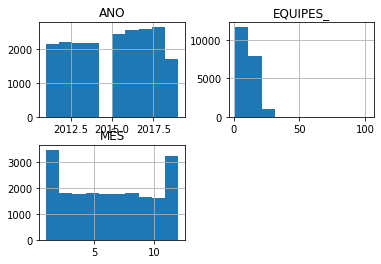

In [0]:
dataset.hist()


# Plotar gráficos

https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

Exemplo de código: 

plt.show()


# Como separar Linhas



No nosso exemplo, vamos deixar no dataset somente os dados de São José dos Campos

In [0]:
datasetCid = dataset.loc[(dataset.CSD == 'SJC')]


Mais detalhes em [link text](https://datatofish.com/select-rows-pandas-dataframe/)

In [0]:
datasetCid

,Data,ANO,MÊS,CSD,EQUIPES_,CSD_NOME
4,2011-01-01,2011,1,SJC,20,SÃO JOSE DOS CAMPOS
10,2011-01-02,2011,1,SJC,16,SÃO JOSE DOS CAMPOS
16,2011-01-03,2011,1,SJC,14,SÃO JOSE DOS CAMPOS
22,2011-01-04,2011,1,SJC,17,SÃO JOSE DOS CAMPOS
28,2011-01-05,2011,1,SJC,17,SÃO JOSE DOS CAMPOS
...,...,...,...,...,...,...
20595,2019-09-11,2019,9,SJC,21,SÃO JOSE DOS CAMPOS
20601,2019-09-12,2019,9,SJC,20,SÃO JOSE DOS CAMPOS
20607,2019-09-13,2019,9,SJC,22,SÃO JOSE DOS CAMPOS
20613,2019-09-14,2019,9,SJC,21,SÃO JOSE DOS CAMPOS


# Selecionar Colunas

In [0]:
datasetSel = dataset[['ANO','MÊS','EQUIPES_']]

In [0]:
datasetSel

,ANO,MÊS,EQUIPES_
0,2011,1,13
1,2011,1,23
2,2011,1,12
3,2011,1,11
4,2011,1,20
...,...,...,...
20616,2019,9,17
20617,2019,9,22
20618,2019,9,12
20619,2019,9,22


# Separando dados de treinamento e teste

Agora separe os dados em um conjunto de treinamento e outro teste.

Iremos utilizar o de conjunto de teste no final da análise do model.

In [0]:
train_dataset = datasetSel.sample(frac=0.8,random_state=0)
test_dataset = datasetSel.drop(train_dataset.index)


Você pode escolher a quantidade de dados que vai utilizar, escolhendo a porcentagem, número de elementos, etc. 

Mais detalhes do "dataset.sample" em [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

Mais detalhes do "dataset.drop" em [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)



In [0]:
train_dataset

,ANO,MÊS,EQUIPES_
74,2011,1,11
17719,2018,7,11
14195,2017,3,18
13906,2017,1,8
7281,2014,5,10
...,...,...,...
7616,2014,7,8
8767,2015,1,28
16388,2018,1,14
19933,2019,5,20


In [0]:
test_dataset

,ANO,MÊS,EQUIPES_
10,2011,1,16
13,2011,1,22
19,2011,1,22
28,2011,1,17
40,2011,1,20
...,...,...,...
20590,2019,9,16
20601,2019,9,20
20602,2019,9,18
20603,2019,9,18


Observem que existem 2530 amostras de treinamento e 633 amostras para teste.

Como discutido nas aulas anteriores, é necessário normalizar ou padronizar os dados. 

# Normalização ou Padronizar os dados

In [0]:
train_stats = train_dataset.describe()
#train_stats.pop("EQUIPES_")
train_stats = train_stats.transpose()
train_stats

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

é possível normalizar os dados utilizando o Sklearn

* names = datasetSel.columns
* scaler = MinMaxScaler()
* scaler.fit(datasetSel)
* print(scaler.data_max_)
* print(scaler.transform(datasetSel))
* print(scaler.transform([[2, 2]]))
* NormdatasetSel=scaler.transform(datasetSel)


Após o processamento é necessário denormalizar os dados

scaler.inverse_transform(NormdatasetSel)

Mais detalhes em: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)



In [0]:
normed_train_data

,ANO,MÊS,EQUIPES_
74,-1.624910,-1.573282,-0.181006
17719,1.186853,0.178778,-0.181006
14195,0.785172,-0.989262,1.165709
13906,0.785172,-1.573282,-0.758169
7281,-0.419869,-0.405242,-0.373394
...,...,...,...
7616,-0.419869,0.178778,-0.758169
8767,-0.018188,-1.573282,3.089588
16388,1.186853,-1.573282,0.396158
19933,1.588533,-0.405242,1.550485


In [0]:
normed_test_data

,ANO,MÊS,EQUIPES_
10,-1.624910,-1.573282,0.780933
13,-1.624910,-1.573282,1.935261
19,-1.624910,-1.573282,1.935261
28,-1.624910,-1.573282,0.973321
40,-1.624910,-1.573282,1.550485
...,...,...,...
20590,1.588533,0.762798,0.780933
20601,1.588533,0.762798,1.550485
20602,1.588533,0.762798,1.165709
20603,1.588533,0.762798,1.165709


# Separando entradas e Saídas

Separe o valor alvo (labels), das features. Essa label é o valor no qual o modelo é treinado para prever.

In [0]:
train_labels = normed_train_data.pop('EQUIPES_')
test_labels = normed_test_data.pop('EQUIPES_')



---


# ATÉ AQUI PREPARAMOS OS DADOS


# Agora vamos para a Rede Neural Artificial

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.sigmoid, input_shape=[len(train_dataset.keys())-1]),
    #layers.Dense(64, activation=tf.nn.relu),
    #layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.716431,0.639914,0.716431,0.645989,0.627027,0.645989,995
996,0.716030,0.640318,0.716029,0.648842,0.628331,0.648842,996
997,0.717079,0.641050,0.717079,0.645039,0.619624,0.645038,997
998,0.716552,0.639561,0.716552,0.646989,0.625290,0.646989,998
999,0.717285,0.640551,0.717285,0.648452,0.620047,0.648452,999


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

NameError: ignored


....................................................................................................
.......................................

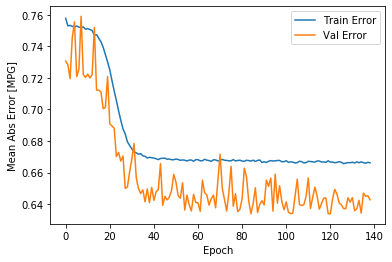

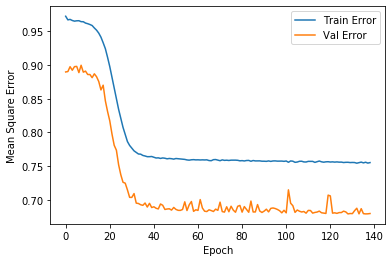

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")